## Can a machine learning model be used to effectively predict whether a person has diabetes or is  potentially diabetic, using the provided data set ?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV




#### Understanding the Data

In [2]:
df = pd.read_csv('Downloads/diabetes_data_upload 4.csv')

In [3]:
df.isna().sum() #Check for missing values.

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [4]:
df.describe().T # Shows general statistics from numeric columns.


,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [5]:
df.Age.unique()


array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26])

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df.select_dtypes(include=['float64', 'int64']).corr('pearson').style.background_gradient(axis=None)

,Age
Age,1.000000


##### Considering the table above description

- Approximately 50% of the patients are below the age of 50.

- There age column exhibits outlier values, evident from a sudden jump from 319, representing 75% of the data, to the maximum value of 4918. Additionally, the high standard deviation surpasses the median value.

- In the 'pdays' column, it is evident that at least 75% of bank customers were never contacted before.

- The 'previous' column displays a similar pattern to the 'pdays' column, indicating that clients were not contacted during the last campaign.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [9]:
df.shape

(520, 17)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_24469/2519816759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True, bins=30)  # Adjust the number of bins as needed
/Users/dopemantwizzy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


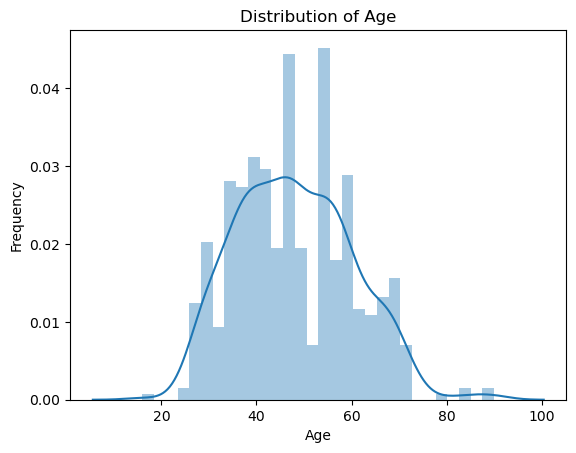

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of age column
sns.distplot(df['Age'], kde=True, bins=30)  # Adjust the number of bins as needed

# Added labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()


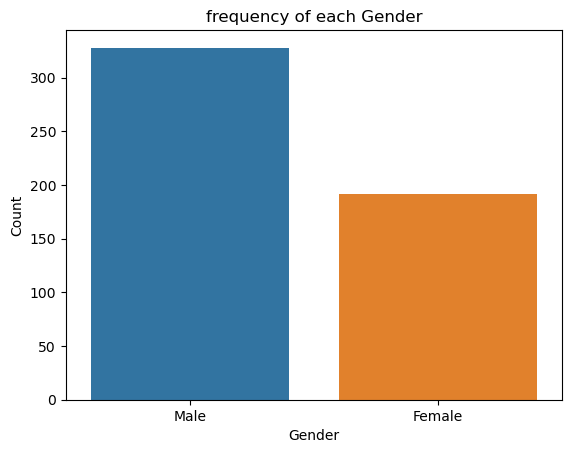

In [11]:
#bar plot of Gender column
sns.countplot(x='Gender', data=df)

# Added labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('frequency of each Gender')


plt.show()

In [12]:
df['Gender'].value_counts()

Gender
Male      328
Female    192
Name: count, dtype: int64

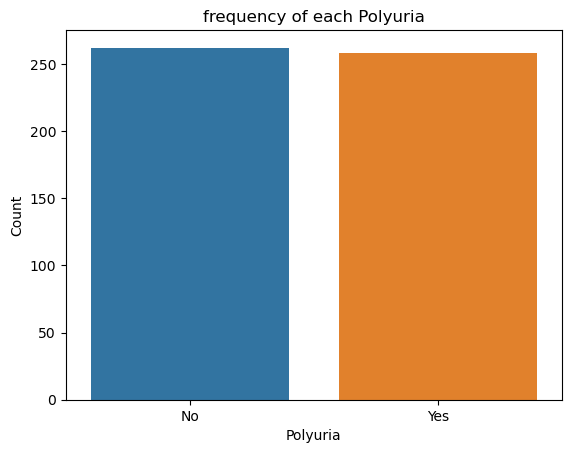

In [13]:
#bar plot of Polyuria column
sns.countplot(x='Polyuria', data=df)

# Added labels and title
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.title('frequency of each Polyuria')


plt.show()

In [14]:
df['Polyuria'].value_counts()

Polyuria
No     262
Yes    258
Name: count, dtype: int64

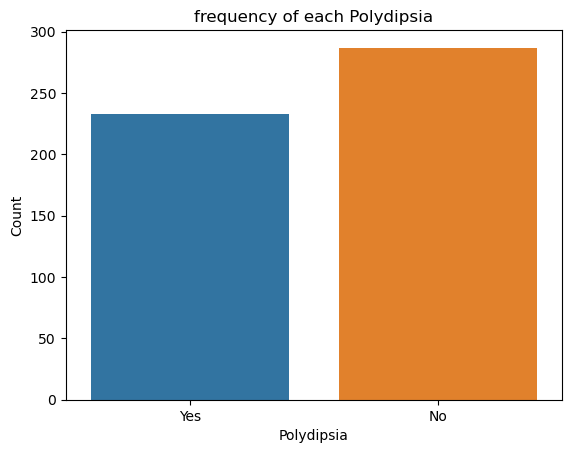

In [15]:
#bar plot of Polydipsia column
sns.countplot(x='Polydipsia', data=df)

# Added labels and title
plt.xlabel('Polydipsia')
plt.ylabel('Count')
plt.title('frequency of each Polydipsia')


plt.show()

In [16]:
df['Polydipsia'].value_counts()

Polydipsia
No     287
Yes    233
Name: count, dtype: int64

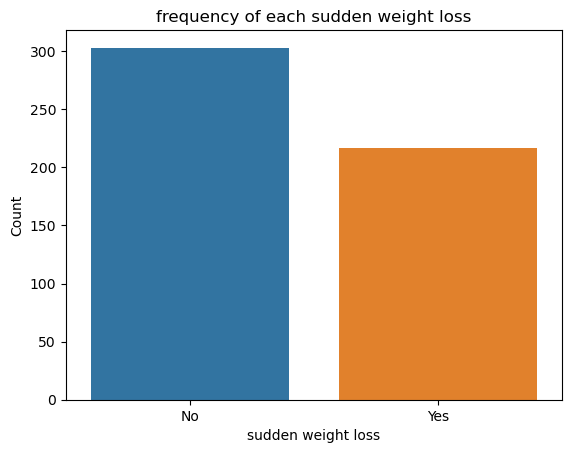

In [17]:
#bar plot of sudden weight loss	 column
sns.countplot(x='sudden weight loss', data=df)

# Added labels and title
plt.xlabel('sudden weight loss')
plt.ylabel('Count')
plt.title('frequency of each sudden weight loss')


plt.show()

In [18]:
df['sudden weight loss'].value_counts()

sudden weight loss
No     303
Yes    217
Name: count, dtype: int64

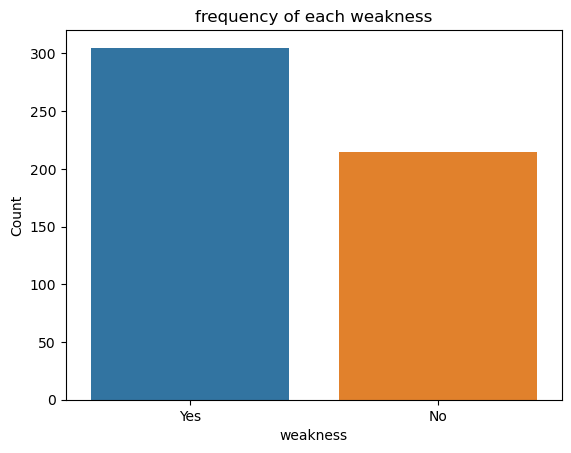

In [19]:
#bar plot of weakness column
sns.countplot(x='weakness', data=df)

# Added labels and title
plt.xlabel('weakness')
plt.ylabel('Count')
plt.title('frequency of each weakness')


plt.show()


In [20]:
df['weakness'].value_counts()

weakness
Yes    305
No     215
Name: count, dtype: int64

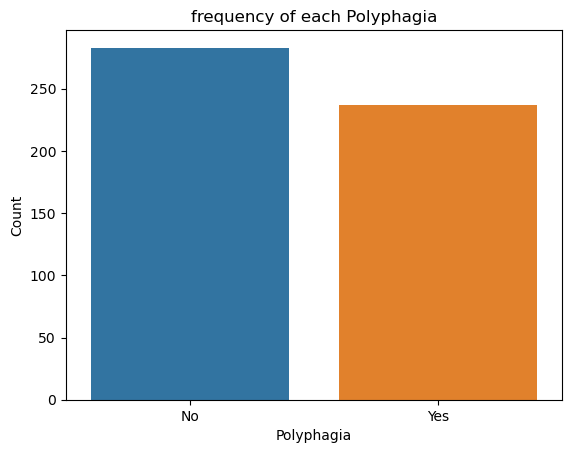

In [21]:
#bar plot of Polyphagia column
sns.countplot(x='Polyphagia', data=df)

# Added labels and title
plt.xlabel('Polyphagia')
plt.ylabel('Count')
plt.title('frequency of each Polyphagia')


plt.show()


In [22]:
df['Polyphagia'].value_counts()

Polyphagia
No     283
Yes    237
Name: count, dtype: int64

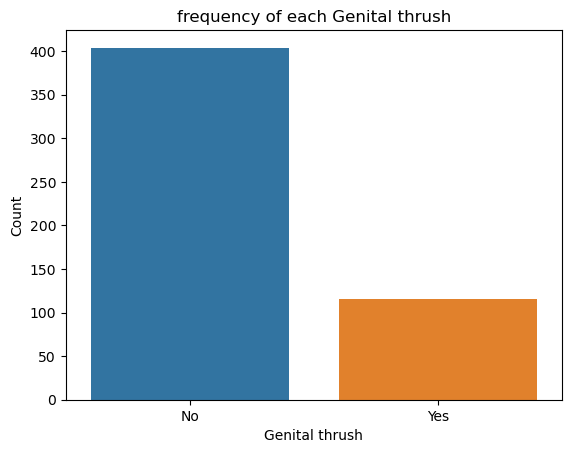

In [23]:
#bar plot of Genital thrush column
sns.countplot(x='Genital thrush', data=df)

# Added labels and title
plt.xlabel('Genital thrush')
plt.ylabel('Count')
plt.title('frequency of each Genital thrush')


plt.show()


In [24]:
df['Genital thrush'].value_counts()

Genital thrush
No     404
Yes    116
Name: count, dtype: int64

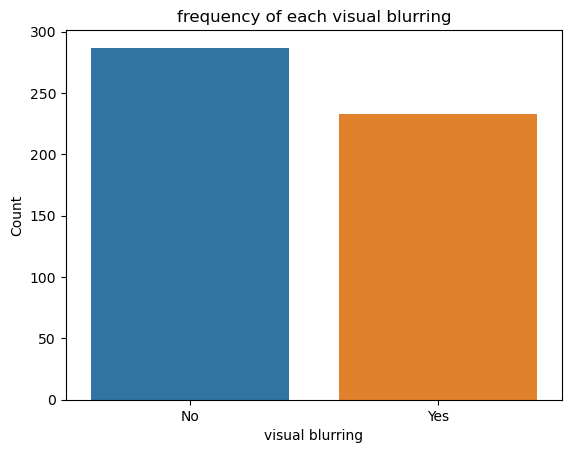

In [25]:
#bar plot of visual blurring column
sns.countplot(x='visual blurring', data=df)

# Added labels and title
plt.xlabel('visual blurring')
plt.ylabel('Count')
plt.title('frequency of each visual blurring')


plt.show()


In [26]:
df['visual blurring'].value_counts()

visual blurring
No     287
Yes    233
Name: count, dtype: int64

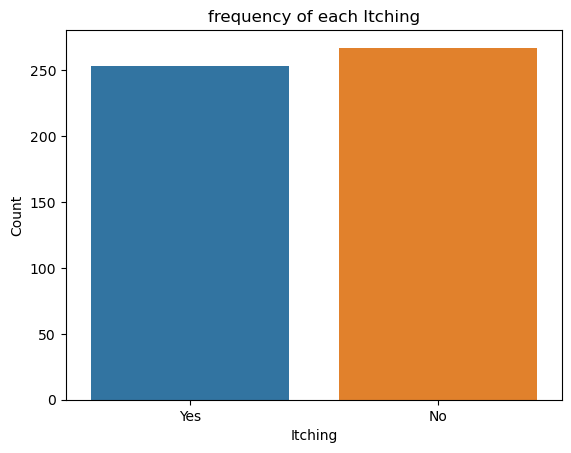

In [27]:
#bar plot of Itching column
sns.countplot(x='Itching', data=df)

# Added labels and title
plt.xlabel('Itching')
plt.ylabel('Count')
plt.title('frequency of each Itching')


plt.show()


In [28]:
df['Itching'].value_counts()

Itching
No     267
Yes    253
Name: count, dtype: int64

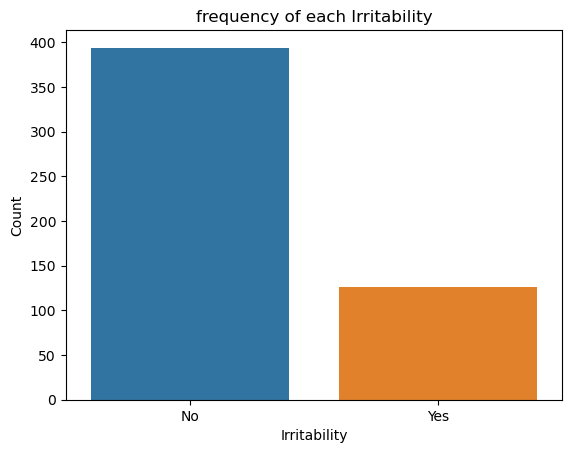

In [29]:
#bar plot of Irritability column
sns.countplot(x='Irritability', data=df)

# Added labels and title
plt.xlabel('Irritability')
plt.ylabel('Count')
plt.title('frequency of each Irritability')


plt.show()

In [30]:
df['Irritability'].value_counts()

Irritability
No     394
Yes    126
Name: count, dtype: int64

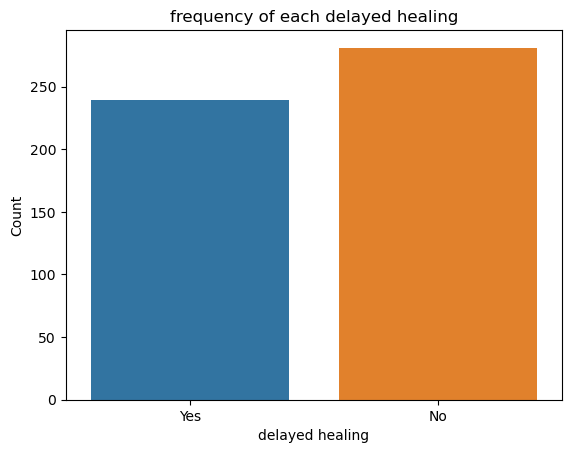

In [31]:
#bar plot of delayed healing column
sns.countplot(x='delayed healing', data=df)

# Added labels and title
plt.xlabel('delayed healing')
plt.ylabel('Count')
plt.title('frequency of each delayed healing')


plt.show()

In [32]:
df['delayed healing'].value_counts()

delayed healing
No     281
Yes    239
Name: count, dtype: int64

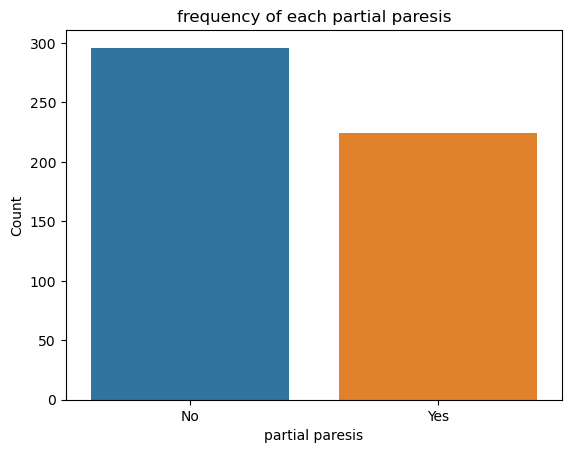

In [33]:
#bar plot of partial paresis column
sns.countplot(x='partial paresis', data=df)

# Added labels and title
plt.xlabel('partial paresis')
plt.ylabel('Count')
plt.title('frequency of each partial paresis')


plt.show()

In [34]:
df['partial paresis'].value_counts()

partial paresis
No     296
Yes    224
Name: count, dtype: int64

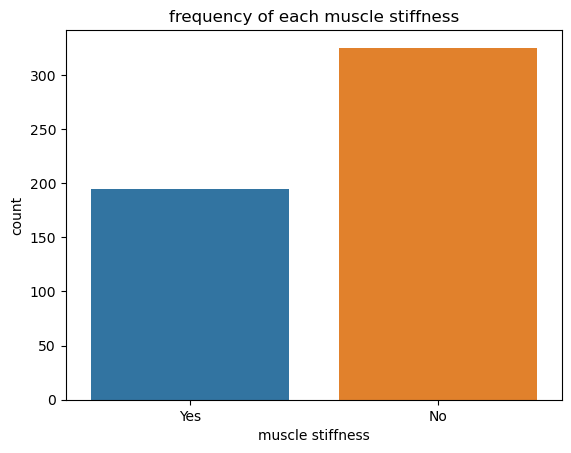

In [35]:
#bar plot of muscle stiffness column
sns.countplot(x='muscle stiffness', data=df)

# Added labels and title
plt.xlabel('muscle stiffness')
plt.ylabel('count')
plt.title('frequency of each muscle stiffness')


plt.show()

In [36]:
df['muscle stiffness'].value_counts()

muscle stiffness
No     325
Yes    195
Name: count, dtype: int64

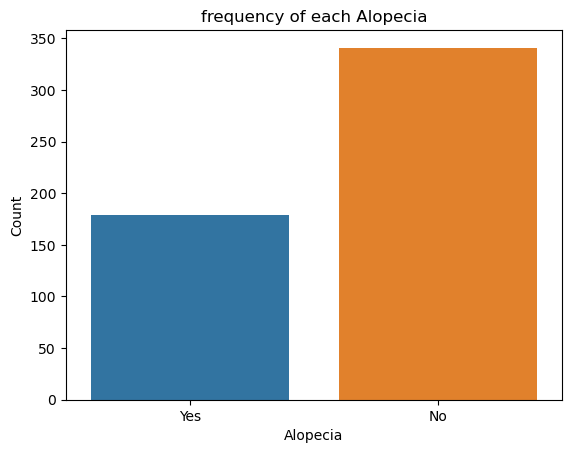

In [37]:
#bar plot of Alopecia column
sns.countplot(x='Alopecia', data=df)

# Added labels and title
plt.xlabel('Alopecia')
plt.ylabel('Count')
plt.title('frequency of each Alopecia')


plt.show()

In [38]:
df['Alopecia'].value_counts()

Alopecia
No     341
Yes    179
Name: count, dtype: int64

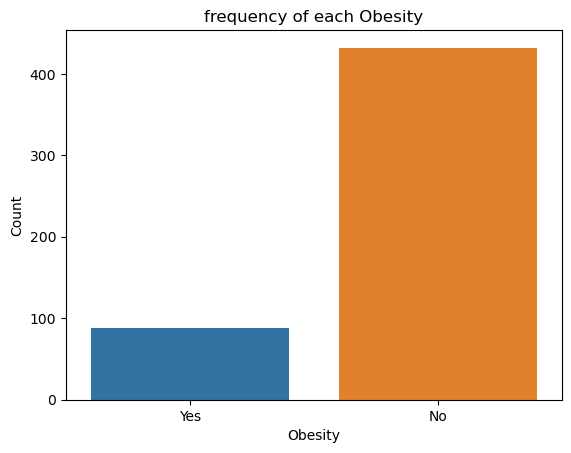

In [39]:
#bar plot of Obesity column
sns.countplot(x='Obesity', data=df)

# Added labels and title
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('frequency of each Obesity')


plt.show()

In [40]:
df['Obesity'].value_counts()

Obesity
No     432
Yes     88
Name: count, dtype: int64

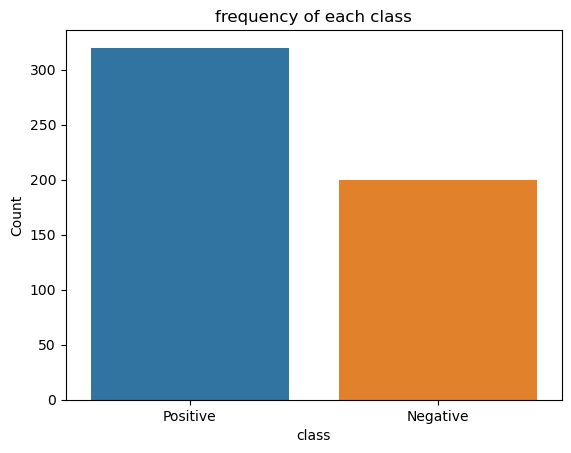

In [41]:
#bar plot of Target column
sns.countplot(x='class', data=df)

# Added labels and title
plt.xlabel('class')
plt.ylabel('Count')
plt.title('frequency of each class')


plt.show()

In [42]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

- The 'age' column appears to exhibit a normal distribution.
- 63% of our patients are male.
- Approximately 42% of our patients had experienced weight loss.
- the following columns were fairly balanced; Polyuria, Polyphagia, Polydipsia, Delayed healing, Partial paresis, itching, visiual blurring.
- Approximately 59% of our patients had experienced weakness.
- 78% of our patients had experienced genital thrush.
- Approximately 24% of our patients had experienced irritalbility.
- 38% of our patients had experienced muscle stiffness.
- 34% of our patients had alopecia.
- 17% of our patients were obese.
- The target column was slighly imbalanced with approximately 62% of the patients labelled positive.

**Business Objective**: Can a machine learning model be used to effectively predict whether a person has diabetes or is  potentially diabetic, using the provided data set ?

#### Engineering Features

In [43]:
import pandas as pd

# Assuming your DataFrame is named df
# Mapping for Yes/No columns
yes_no_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}
class_mapping = {'Positive': 1, 'Negative': 0}

# Columns to map
columns_to_map = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

# Apply mapping
df[columns_to_map] = df[columns_to_map].replace(yes_no_mapping)
df['Gender'] = df['Gender'].replace(gender_mapping)
df['class'] = df['class'].replace(class_mapping)


In [44]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### Train/Test Split

In [45]:
# Split into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### A Baseline Model

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Created a Dummy Classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Fit the Dummy Classifier on the training data
dummy_classifier.fit(X_train, y_train)

# Made predictions on the test set
dummy_pred = dummy_classifier.predict(X_test)

# Calculated accuracy
dummy_accuracy = accuracy_score(y_test, dummy_pred)

print(f"Dummy Classifier Accuracy: {dummy_accuracy:.2%}")


Dummy Classifier Accuracy: 66.67%


In [47]:
dummy_precision = precision_score(y_test, dummy_pred)
print(f"Dummy Classifier Precision: {dummy_precision:.2%}")

Dummy Classifier Precision: 66.67%


#### Model Comparisons

In [48]:

# Initialized models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Created a DataFrame to store the results
results_list = []


# Looped through models
for model_name, model in models.items():
    start_time = time.time()
    
    # Trained the model
    model.fit(X_train, y_train)
    
    # Recorded training time
    train_time = time.time() - start_time
    
    # Predictions on training set
    train_pred = model.predict(X_train)
    
    # Predictions on test set
    test_pred = model.predict(X_test)
    
    # Recorded training and test accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Appended results to DataFrame
    results_list.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })



results_df = pd.DataFrame(results_list, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
# Display the results
results_df


/Users/dopemantwizzy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.028413,0.920814,0.910256
1,KNN,0.001154,0.914027,0.858974
2,Decision Tree,0.049137,1.000000,0.974359
3,SVM,0.007607,0.606335,0.666667


#### Improving the Model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)


# Displayed the best parameters and corresponding score
print("Logistic Regression - Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression - Best Accuracy:", logreg_grid.best_score_)




Logistic Regression - Best Parameters: {'C': 1, 'penalty': 'l2'}
Logistic Regression - Best Accuracy: 0.9207609805924413


/Users/dopemantwizzy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dopemantwizzy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


# Separated features (X) and target variable (y)
X = df.drop(['class'], axis=1) 

# Converted categorical variables to dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardized the features (optional but often recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Created and train the Logistic Regression model
model = LogisticRegression(random_state=42, C=1, penalty='l2')
model.fit(X_train_scaled, y_train)

# Made predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluated the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printed the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9359
Precision: 0.9510
Recall: 0.9510
F1-Score: 0.9510
Confusion Matrix:
[[49  5]
 [ 5 97]]


In [51]:
feature_names = X.columns  
coefficients = model.coef_[0]

# Created a DataFrame to store feature names and coefficients
feature_coefs = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorted the DataFrame by absolute coefficient values for better visualization
feature_coefs['Absolute Coefficient'] = feature_coefs['Coefficient'].abs()
feature_coefs = feature_coefs.sort_values(by='Absolute Coefficient', ascending=False)

# Displayed the feature names and corresponding coefficients
print(feature_coefs[['Feature', 'Coefficient']])

               Feature  Coefficient
3           Polydipsia     1.726052
2             Polyuria     1.581134
1               Gender    -1.440782
9              Itching    -0.969972
10        Irritability     0.745172
7       Genital thrush     0.703556
12     partial paresis     0.576789
8      visual blurring     0.487522
4   sudden weight loss     0.437971
0                  Age    -0.434526
5             weakness     0.320962
11     delayed healing    -0.318242
13    muscle stiffness    -0.191663
6           Polyphagia     0.176135
15             Obesity    -0.106211
14            Alopecia     0.038476


In [52]:
feature_coefs10 = feature_coefs.head(10)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_24469/1545456753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_coefs10.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)


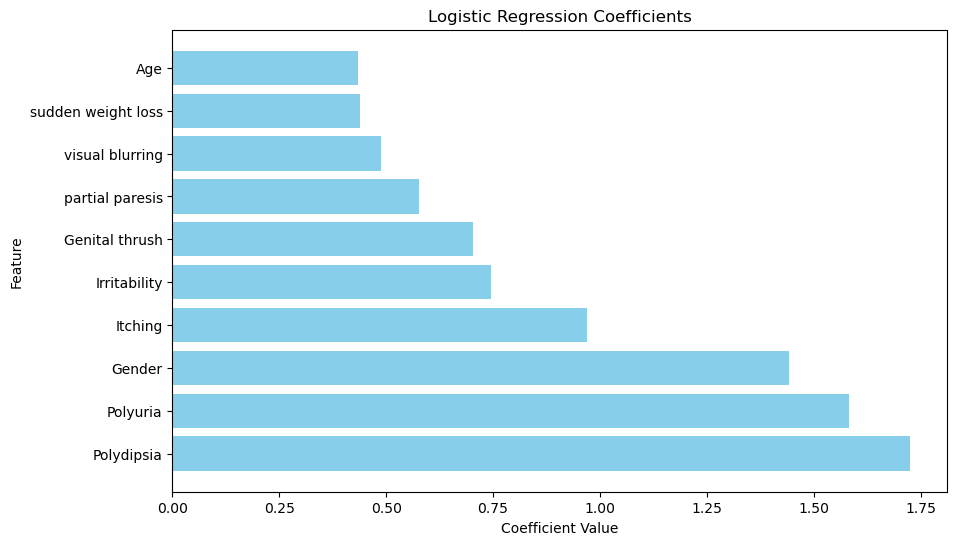

In [53]:
import matplotlib.pyplot as plt

# Assuming 'feature' is the column containing feature names, and 'coef' is the column containing coefficients
feature_coefs10.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_coefs10['Feature'], feature_coefs10['Absolute Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()